**Подключение библиотек и скриптов**

In [780]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 3, 2
%config InlineBackend.figure_format = 'svg'

In [781]:
import warnings
warnings.filterwarnings('ignore')

**Пути к директориям и файлам**

In [782]:
TRAIN_DATASET_PATH = 'train.csv'
PREPARED_TRAIN_DATASET_PATH = 'train_prepared.csv'
TEST_DATASET_PATH = 'test.csv'

In [783]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(10,5))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

### Загрузка данных

**Описание датасета**

* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

In [784]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.289571
9997,5123,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808
9999,6306,128,1.0,38.666645,21.157874,8.0,7,17.0,1990,0.000000,B,B,27,4798,0,30.0,2,8,B,218714.077615


In [785]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,B,B,36,5992,0,NaN,1,1,B
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,B,B,1,264,0,NaN,0,1,B
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,NaN,5,15,B
4998,4780,62,2.0,81.305222,NaN,0.0,4,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A
4999,12504,30,2.0,60.555693,NaN,1.0,10,17.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B


In [786]:
train_df.shape[1]-1 == test_df.shape[1]

True

### Приведение типов

In [787]:
train_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [788]:
#Задание №1 
#привести Id и DistrictId к типу str
train_df = train_df.astype({"Id": str, "DistrictId": str})
train_df.dtypes

Id                object
DistrictId        object
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

### Обзор данных

**Количественные переменные**

In [789]:
#Задание №2
#С помощью .describe получить первичное понимание того, что из себя представляют данные
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


**Номинативные переменные**

In [790]:
#Задание №3
#С помощью .select_dtypes получить список категориальных признаков
#Также посчитать количество уникальных значений этих категориальных признаков
train_df_object = train_df.select_dtypes(include=['object'])
train_df_object.head()

,Id,DistrictId,Ecology_2,Ecology_3,Shops_2
0,14038,35,B,B,B
1,15053,41,B,B,B
2,4765,53,B,B,B
3,5809,58,B,B,B
4,10783,99,B,B,B


In [791]:
train_df_object.nunique()

Id            10000
DistrictId      205
Ecology_2         2
Ecology_3         2
Shops_2           2
dtype: int64

### Обработка выбросов

In [792]:
#Задание №4
#Обработать выбросы, подсказка: обратить внимание на признаки, связанные с параметрами домов, год постройки
#Выбросы в некоторых признаках можно найти с помощью квантилей.
train_df.loc[train_df['HouseYear'] > 2021,'HouseYear'] = train_df['HouseYear'].median()

<AxesSubplot:xlabel='HouseYear'>

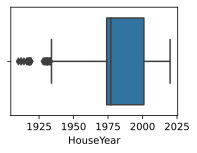

In [793]:
sns.boxplot(train_df['HouseYear'])

<AxesSubplot:xlabel='HouseYear'>

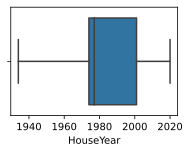

In [794]:
train_df.loc[train_df['HouseYear'] < 1934,'HouseYear'] = train_df['HouseYear'].median()
sns.boxplot(train_df['HouseYear'])

<AxesSubplot:xlabel='Rooms'>

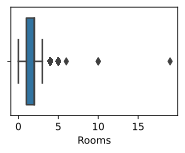

In [795]:
sns.boxplot(train_df['Rooms'])

<AxesSubplot:xlabel='Rooms'>

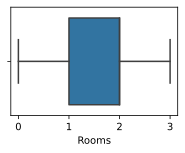

In [796]:
train_df.loc[train_df['Rooms'] > 3,'Rooms'] = train_df['Rooms'].median()
sns.boxplot(train_df['Rooms'])

<AxesSubplot:xlabel='Square'>

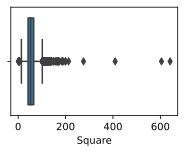

In [797]:
sns.boxplot(train_df['Square'])

<AxesSubplot:xlabel='Square'>

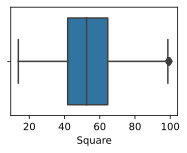

In [798]:
train_df.loc[train_df['Square'] > 100,'Square'] = train_df['Square'].median()
train_df.loc[train_df['Square'] < 10,'Square'] = train_df['Square'].median()
sns.boxplot(train_df['Square'])

<AxesSubplot:xlabel='LifeSquare'>

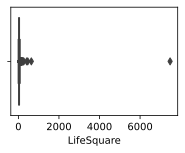

In [799]:
sns.boxplot(train_df['LifeSquare'])

<AxesSubplot:xlabel='LifeSquare'>

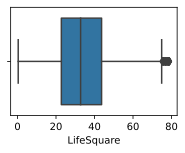

In [800]:
train_df.loc[train_df['LifeSquare'] > 79,'LifeSquare'] = train_df['LifeSquare'].median()
sns.boxplot(train_df['LifeSquare'])

<AxesSubplot:xlabel='KitchenSquare'>

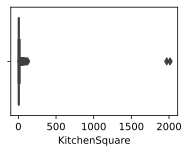

In [801]:
sns.boxplot(train_df['KitchenSquare'])

<AxesSubplot:xlabel='KitchenSquare'>

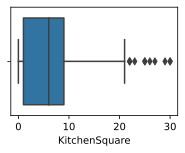

In [802]:
train_df.loc[train_df['KitchenSquare'] > 30,'KitchenSquare'] = train_df['KitchenSquare'].median()
sns.boxplot(train_df['KitchenSquare'])

<AxesSubplot:xlabel='Floor'>

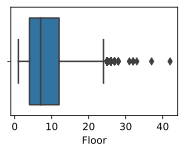

In [803]:
sns.boxplot(train_df['Floor'])

<AxesSubplot:xlabel='Floor'>

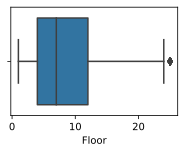

In [804]:
train_df.loc[train_df['Floor'] > 25,'Floor'] = train_df['Floor'].median()
sns.boxplot(train_df['Floor'])

<AxesSubplot:xlabel='HouseFloor'>

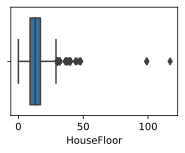

In [805]:
sns.boxplot(train_df['HouseFloor'])

<AxesSubplot:xlabel='HouseFloor'>

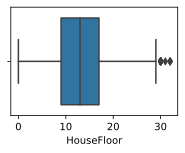

In [806]:
train_df.loc[train_df['HouseFloor'] > 35,'HouseFloor'] = train_df['HouseFloor'].median()
sns.boxplot(train_df['HouseFloor'])

<AxesSubplot:xlabel='Social_2'>

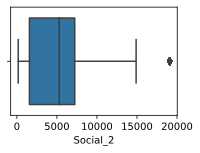

In [807]:
sns.boxplot(train_df['Social_2'])

<AxesSubplot:xlabel='Social_2'>

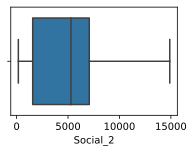

In [808]:
train_df.loc[train_df['Social_2'] > 15000,'Social_2'] = train_df['Social_2'].median()
sns.boxplot(train_df['Social_2'])

<AxesSubplot:xlabel='Social_3'>

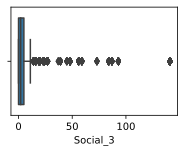

In [809]:
sns.boxplot(train_df['Social_3'])

<AxesSubplot:xlabel='Social_3'>

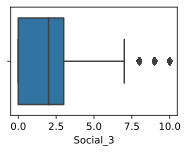

In [810]:
train_df.loc[train_df['Social_3'] > 10,'Social_3'] = train_df['Social_3'].median()
sns.boxplot(train_df['Social_3'])

<AxesSubplot:xlabel='Price'>

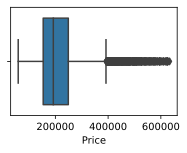

In [811]:
sns.boxplot(train_df['Price'])

<AxesSubplot:xlabel='Price'>

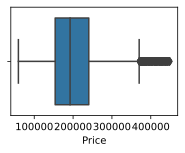

In [812]:
train_df.loc[train_df['Price'] > 450000,'Price'] = train_df['Price'].median()
sns.boxplot(train_df['Price'])

<AxesSubplot:xlabel='Healthcare_1'>

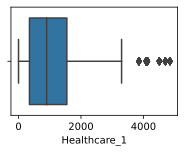

In [813]:
sns.boxplot(train_df['Healthcare_1'])

<AxesSubplot:xlabel='Healthcare_1'>

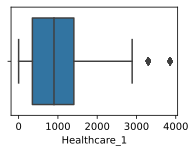

In [814]:
train_df.loc[train_df['Healthcare_1'] > 4000,'Healthcare_1'] = train_df['Healthcare_1'].median()
sns.boxplot(train_df['Healthcare_1'])

<AxesSubplot:xlabel='Shops_1'>

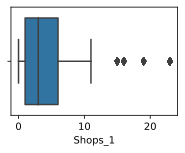

In [815]:
sns.boxplot(train_df['Shops_1'])

<AxesSubplot:xlabel='Shops_1'>

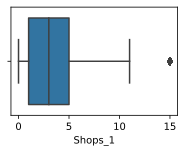

In [816]:
train_df.loc[train_df['Shops_1'] > 15,'Shops_1'] = train_df['Shops_1'].median()
sns.boxplot(train_df['Shops_1'])

In [817]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.851400,54.499120,34.224600,5.698700,8.459700,12.526600,1985.052600,0.118858,24.687000,5109.312600,2.223600,1029.343329,1.319500,3.555000,204336.970850
std,0.758403,15.639543,14.031997,3.934446,5.121015,6.459928,18.050225,0.119025,17.532614,3560.474465,2.394447,829.803216,1.493601,3.442493,75877.271939
min,0.000000,13.784865,0.370619,0.000000,1.000000,0.000000,1934.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.794392,22.769832,1.000000,4.000000,9.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513175,32.781260,6.000000,7.000000,13.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192265.804075
75%,2.000000,64.538015,43.679384,9.000000,12.000000,17.000000,2001.000000,0.195781,36.000000,7065.000000,3.000000,1406.000000,2.000000,5.000000,240420.133667
max,3.000000,99.893009,78.995743,30.000000,25.000000,32.000000,2020.000000,0.521867,74.000000,14892.000000,10.000000,3855.000000,6.000000,15.000000,449776.104394


### Обработка пропусков

In [818]:
#Задание №5
#Посчитать количество пропусков в каждом признаке
#Заменить пропуски медианой
train_df.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [819]:
train_df.loc[train_df['LifeSquare'].isna(),:]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
21,11935,27,2.0,64.711835,NaN,1.0,15,1.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,127200.026511
23,6641,54,3.0,52.513310,NaN,0.0,2,0.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,192269.644879
25,5073,74,2.0,82.667915,NaN,1.0,16,17.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,244145.827069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,16159,27,1.0,38.968338,NaN,1.0,10,1.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,95529.569405
9986,2996,1,2.0,64.994245,NaN,1.0,9,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,200332.511658
9987,15623,23,2.0,55.620092,NaN,0.0,2,4.0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,115797.553006
9994,4158,23,2.0,64.864198,NaN,1.0,17,17.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,171323.515653


In [820]:
train_df.loc[train_df['LifeSquare'].isna(),'LifeSquare'] = train_df['LifeSquare'].median()

In [821]:
train_df.loc[train_df['Healthcare_1'].isna(),:]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,2,NaN,1,5,B,296021.204377
7,11993,74,2.0,80.312926,32.781260,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,32.781260,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,14333,150,3.0,78.249637,49.385096,10.0,5,16.0,1976,0.300323,B,B,52,10311,6,NaN,1,9,B,342418.758888
9993,48,13,3.0,80.631333,48.899083,10.0,11,14.0,1999,0.090799,B,B,74,5285,2,NaN,5,15,B,350684.628560
9994,4158,23,2.0,64.864198,32.781260,1.0,17,17.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,171323.515653
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.289571


In [822]:
train_df.loc[train_df['Healthcare_1'].isna(),'Healthcare_1'] = train_df['Healthcare_1'].median()
train_df.isna().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

### Построение новых признаков

**OneHotEncoding**

In [823]:
#Задание №5
#Для категориальных переменных(несвязанных с Id) провести onehotencoding 

Построить новые 2 признака **DistrictSize, IsDistrictLarge** где DistrictSize = количество уникальных значений DistrictId в train_df(например, DistrictId=35 встречалось в train_df 22 раза, значит DistrictSize=22)
Для этого создайте датафрейм district_size на основе информации из train_df. В датафрейме district_size должны быть 2 столбца: DistrictId, DistrictSize. После смерджить полученный датасет с train_df и сохранить результат в train_df.


IsDistrictLarge = это индикатор(1 или 0) того, что DistrictSize>100 или нет

Для примера возьму значения 1 строки:
Id = 14038; DistrictId = 35; DistrictSize = 22; IsDistrictLarge = 0

In [824]:
district_size = train_df['DistrictId'].value_counts().reset_index().rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
district_size.head(10)

,DistrictId,DistrictSize
0,27,851
1,1,652
2,23,565
3,6,511
4,9,294
5,62,247
6,30,228
7,58,179
8,53,174
9,21,165


In [825]:
train_df = pd.merge(train_df, district_size, how="right")
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,DistrictSize
0,10953,27,1.0,53.769097,52.408027,1.0,5,4.0,1977,0.072158,...,B,2,629,1,900.0,0,0,A,140647.565937,851
1,2119,27,2.0,49.360648,31.993964,5.0,6,5.0,1983,0.051815,...,B,5,1227,0,900.0,0,0,B,117000.381287,851
2,11935,27,2.0,64.711835,32.781260,1.0,15,1.0,1977,0.211401,...,B,9,1892,0,900.0,0,1,B,127200.026511,851
3,4378,27,3.0,52.513310,0.641822,0.0,17,0.0,2018,0.072158,...,B,2,629,1,900.0,0,0,A,337299.867936,851
4,13253,27,2.0,63.679116,37.275775,1.0,9,15.0,1977,0.017647,...,B,2,469,0,900.0,0,0,B,178721.706337,851


In [826]:
train_df['IsDistrictLarge'] = (train_df['DistrictSize'] > 100).astype(int)
train_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,DistrictSize,IsDistrictLarge
9995,491,117,3.0,65.437471,40.225576,8.0,8,12.0,1982,0.000000e+00,...,33,7425,1,900.0,2,5,B,386569.255841,1,0
9996,4586,196,2.0,47.080098,28.525317,6.0,3,10.0,1966,0.000000e+00,...,30,7538,2,900.0,5,5,B,336584.118092,1,0
9997,11120,207,3.0,76.780960,55.770043,7.0,2,5.0,1977,1.800000e-09,...,16,3681,2,1815.0,2,5,B,426186.409334,1,0
9998,5930,199,3.0,71.109206,36.527485,13.0,4,11.0,1962,1.800000e-09,...,16,3681,2,1815.0,2,5,B,432546.129741,1,0
9999,14261,174,3.0,65.812757,48.988726,6.0,5,7.0,1935,7.815280e-05,...,22,6398,2,1046.0,3,3,B,421851.953639,1,0


In [827]:
class DataPreprocessing:
    """Подготовка исходных данных"""

    def __init__(self):
        """Параметры класса"""
        self.medians = None
        self.kitchen_square_quantile = None
        
    def fit(self, X):
        """Сохранение статистик"""       
        # Расчет медиан
        self.medians = X.median()
        self.kitchen_square_quantile = X['KitchenSquare'].quantile(.975)
    
    def transform(self, X):
        """Трансформация данных"""

        # Rooms
        X['Rooms_outlier'] = 0
        X.loc[(X['Rooms'] == 0) | (X['Rooms'] >= 6), 'Rooms_outlier'] = 1
        
        X.loc[X['Rooms'] == 0, 'Rooms'] = 1
        X.loc[X['Rooms'] >= 6, 'Rooms'] = self.medians['Rooms']
        
        # KitchenSquare
        condition = (X['KitchenSquare'].isna()) \
                    | (X['KitchenSquare'] > self.kitchen_square_quantile)
        
        X.loc[condition, 'KitchenSquare'] = self.medians['KitchenSquare']

        X.loc[X['KitchenSquare'] < 3, 'KitchenSquare'] = 3
        
        # HouseFloor, Floor
        X['HouseFloor_outlier'] = 0
        X.loc[X['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
        X.loc[X['Floor'] > X['HouseFloor'], 'HouseFloor_outlier'] = 1
        
        X.loc[X['HouseFloor'] == 0, 'HouseFloor'] = self.medians['HouseFloor']
        
        floor_outliers = X.loc[X['Floor'] > X['HouseFloor']].index
        X.loc[floor_outliers, 'Floor'] = X.loc[floor_outliers, 'HouseFloor']\
                                            .apply(lambda x: random.randint(1, x))
        
        # HouseYear
        current_year = datetime.now().year
        
        X['HouseYear_outlier'] = 0
        X.loc[X['HouseYear'] > current_year, 'HouseYear_outlier'] = 1
        
        X.loc[X['HouseYear'] > current_year, 'HouseYear'] = current_year
        
        # Healthcare_1
        if 'Healthcare_1' in X.columns:
            X.drop('Healthcare_1', axis=1, inplace=True)
            
        # LifeSquare
        X['LifeSquare_nan'] = X['LifeSquare'].isna() * 1
        condition = (X['LifeSquare'].isna()) & \
                      (~X['Square'].isna()) & \
                      (~X['KitchenSquare'].isna())
        
        X.loc[condition, 'LifeSquare'] = X.loc[condition, 'Square'] - X.loc[condition, 'KitchenSquare'] - 3
        
        
        X.fillna(self.medians, inplace=True)
        
        return X

In [828]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               10000 non-null  object 
 1   DistrictId       10000 non-null  object 
 2   Rooms            10000 non-null  float64
 3   Square           10000 non-null  float64
 4   LifeSquare       10000 non-null  float64
 5   KitchenSquare    10000 non-null  float64
 6   Floor            10000 non-null  int64  
 7   HouseFloor       10000 non-null  float64
 8   HouseYear        10000 non-null  int64  
 9   Ecology_1        10000 non-null  float64
 10  Ecology_2        10000 non-null  object 
 11  Ecology_3        10000 non-null  object 
 12  Social_1         10000 non-null  int64  
 13  Social_2         10000 non-null  int64  
 14  Social_3         10000 non-null  int64  
 15  Healthcare_1     10000 non-null  float64
 16  Helthcare_2      10000 non-null  int64  
 17  Shops_1      

In [829]:
train_df["Ecology_3"].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [830]:
train_df["Ecology_2"].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [831]:
train_df["Shops_2"].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [832]:
bin_dict = {'A': 0, 'B': 1}
train_df["Ecology_3"] = train_df["Ecology_3"].replace(bin_dict)
train_df["Ecology_2"] = train_df["Ecology_2"].replace(bin_dict)
train_df["Shops_2"] = train_df["Shops_2"].replace(bin_dict)

In [833]:
train_df.dtypes

Id                  object
DistrictId          object
Rooms              float64
Square             float64
LifeSquare         float64
KitchenSquare      float64
Floor                int64
HouseFloor         float64
HouseYear            int64
Ecology_1          float64
Ecology_2            int64
Ecology_3            int64
Social_1             int64
Social_2             int64
Social_3             int64
Healthcare_1       float64
Helthcare_2          int64
Shops_1              int64
Shops_2              int64
Price              float64
DistrictSize         int64
IsDistrictLarge      int32
dtype: object

Построение признака **MedPriceByDistrict**

Создайте датафрейм med_price_by_district, который содержит информацию о медианной цене домов в одном районе и с одинаковым количеством комнат. После смерджите med_price_by_district и train_df по 2-м признакам

In [834]:
med_price_by_district = train_df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'}).rename(columns={'Price':'MedPriceByDistrict'})
med_price_by_district.head()

,DistrictId,Rooms,MedPriceByDistrict
0,0,1.0,142799.434052
1,0,2.0,176210.812334
2,0,3.0,289528.364995
3,1,1.0,146735.671740
4,1,2.0,202706.090239


In [835]:
train_df = pd.merge(train_df, med_price_by_district,on=["DistrictId", "Rooms"], how="right")
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,DistrictSize,IsDistrictLarge,MedPriceByDistrict
0,9302,0,1.0,36.158717,24.286117,5.0,2,5.0,1963,0.319809,...,4756,2,2857.0,5,8,1,147258.736617,48,0,142799.434052
1,2039,0,1.0,30.945973,18.966367,5.0,5,5.0,1974,0.319809,...,4756,2,2857.0,5,8,1,160762.929303,48,0,142799.434052
2,13685,0,1.0,17.498542,13.446544,0.0,7,5.0,1961,0.319809,...,4756,2,2857.0,5,8,1,88871.750230,48,0,142799.434052
3,6438,0,1.0,52.792256,51.156269,10.0,9,17.0,2017,0.006076,...,5285,0,645.0,6,6,1,155726.755440,48,0,142799.434052
4,11008,0,1.0,46.934108,18.866829,10.0,16,17.0,2010,0.006076,...,5285,0,645.0,6,6,1,85770.442001,48,0,142799.434052


In [836]:
import random
from datetime import *

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams.update({'font.size': 14})

In [837]:
med_price_by_district = train_df.groupby(['DistrictId', 'Square'], as_index=False).agg({'Price':'median'}).rename(columns={'Price':'MedPriceByDistrict'})

med_price_by_district.head()

,DistrictId,Square,MedPriceByDistrict
0,0,17.498542,88871.750230
1,0,19.927423,102395.788856
2,0,30.945973,160762.929303
3,0,31.114313,156228.378464
4,0,32.416925,125579.315184


In [838]:
train_df = train_df.merge(med_price_by_district, on=['DistrictId', 'Square'], how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,DistrictSize,IsDistrictLarge,MedPriceByDistrict_x,MedPriceByDistrict_y
0,9302,0,1.0,36.158717,24.286117,5.0,2,5.0,1963,0.319809,...,2,2857.0,5,8,1,147258.736617,48,0,142799.434052,147258.736617
1,2039,0,1.0,30.945973,18.966367,5.0,5,5.0,1974,0.319809,...,2,2857.0,5,8,1,160762.929303,48,0,142799.434052,160762.929303
2,13685,0,1.0,17.498542,13.446544,0.0,7,5.0,1961,0.319809,...,2,2857.0,5,8,1,88871.750230,48,0,142799.434052,88871.750230
3,6438,0,1.0,52.792256,51.156269,10.0,9,17.0,2017,0.006076,...,0,645.0,6,6,1,155726.755440,48,0,142799.434052,155726.755440
4,11008,0,1.0,46.934108,18.866829,10.0,16,17.0,2010,0.006076,...,0,645.0,6,6,1,85770.442001,48,0,142799.434052,85770.442001


In [839]:
class FeatureGenetator():
    """Генерация новых фич"""
    
    def __init__(self):
        self.DistrictId_counts = None
        self.binary_to_numbers = None
        self.med_price_by_district = None
        self.med_price_by_floor_year = None
        self.house_year_max = None
        self.floor_max = None
        self.district_size = None
        
    def fit(self, X, y=None):
        
        X = X.copy()
        
        # Binary features
        self.binary_to_numbers = {'A': 0, 'B': 1}
        
        # DistrictID
        self.district_size = X['DistrictId'].value_counts().reset_index() \
                               .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
                
        # Target encoding
        ## District, Rooms
        df = X.copy()
        
        if y is not None:
            df['Price'] = y.values
            
            self.med_price_by_district = df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                                            .rename(columns={'Price':'MedPriceByDistrict'})
            
            self.med_price_by_district_median = self.med_price_by_district['MedPriceByDistrict'].median()
            
        ## floor, year
        if y is not None:
            self.floor_max = df['Floor'].max()
            self.house_year_max = df['HouseYear'].max()
            df['Price'] = y.values
            df = self.floor_to_cat(df)
            df = self.year_to_cat(df)
            self.med_price_by_floor_year = df.groupby(['year_cat', 'floor_cat'], as_index=False).agg({'Price':'median'}).\
                                            rename(columns={'Price':'MedPriceByFloorYear'})
            self.med_price_by_floor_year_median = self.med_price_by_floor_year['MedPriceByFloorYear'].median()
        

        
    def transform(self, X):
        
        # Binary features
        X['Ecology_2'] = X['Ecology_2'].map(self.binary_to_numbers)  # self.binary_to_numbers = {'A': 0, 'B': 1}
        X['Ecology_3'] = X['Ecology_3'].map(self.binary_to_numbers)
        X['Shops_2'] = X['Shops_2'].map(self.binary_to_numbers)
        
        # DistrictId, IsDistrictLarge
        X = X.merge(self.district_size, on='DistrictId', how='left')
        
        X['new_district'] = 0
        X.loc[X['DistrictSize'].isna(), 'new_district'] = 1
        
        X['DistrictSize'].fillna(5, inplace=True)
        
        X['IsDistrictLarge'] = (X['DistrictSize'] > 100).astype(int)
        
        # More categorical features
        X = self.floor_to_cat(X)  # + столбец floor_cat
        X = self.year_to_cat(X)   # + столбец year_cat
        
        # Target encoding
        if self.med_price_by_district is not None:
            X = X.merge(self.med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
            X['MedPriceByDistrict'].fillna(self.med_price_by_district_median, inplace=True)
            
        if self.med_price_by_floor_year is not None:
            X = X.merge(self.med_price_by_floor_year, on=['year_cat', 'floor_cat'], how='left')
            X['MedPriceByFloorYear'].fillna(self.med_price_by_floor_year_median, inplace=True)
        
        return X
    
    def floor_to_cat(self, X):
        bins = [0, 3, 5, 9, 15, self.floor_max]
        X['floor_cat'] = pd.cut(X['Floor'], bins=bins, labels=False)

        X['floor_cat'].fillna(-1, inplace=True) 
        return X
     
    def year_to_cat(self, X):
        bins = [0, 1941, 1945, 1980, 2000, 2010, self.house_year_max]
        X['year_cat'] = pd.cut(X['HouseYear'], bins=bins, labels=False)

        X['year_cat'].fillna(-1, inplace=True)
        return X

In [840]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3','Helthcare_2', 'Shops_1', 'Shops_2']
# new_feature_names = ['Rooms_outlier', 'HouseFloor_outlier', 'HouseYear_outlier', 'LifeSquare_nan', 'DistrictSize', 'new_district', 'IsDistrictLarge',  'MedPriceByDistrict', 'MedPriceByFloorYear']
target_name = 'Price'

In [841]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
test_df = pd.read_csv(TEST_DATASET_PATH)

X = train_df.drop(columns=target_name)
y = train_df[target_name]

In [842]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)

In [843]:
preprocessor = DataPreprocessing()
preprocessor.fit(X_train)

X_train = preprocessor.transform(X_train)
X_valid = preprocessor.transform(X_valid)
test_df = preprocessor.transform(test_df)

X_train.shape, X_valid.shape, test_df.shape

((6700, 22), (3300, 22), (5000, 22))

In [844]:
features_gen = FeatureGenetator()
features_gen.fit(X_train, y_train)

X_train = features_gen.transform(X_train)
X_valid = features_gen.transform(X_valid)
test_df = features_gen.transform(test_df)

X_train.shape, X_valid.shape, test_df.shape

((6700, 29), (3300, 29), (5000, 29))

In [845]:
X_train = X_train[feature_names + new_feature_names]
X_valid = X_valid[feature_names + new_feature_names]
test_df = test_df[feature_names + new_feature_names]

In [846]:
X_train.isna().sum().sum(), X_valid.isna().sum().sum(), test_df.isna().sum().sum()

(0, 0, 0)

### Обучение модели

In [847]:
rf_model = RandomForestRegressor(random_state=21, criterion='mse')
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=21)

Train R2:	0.968
Test R2:	0.701


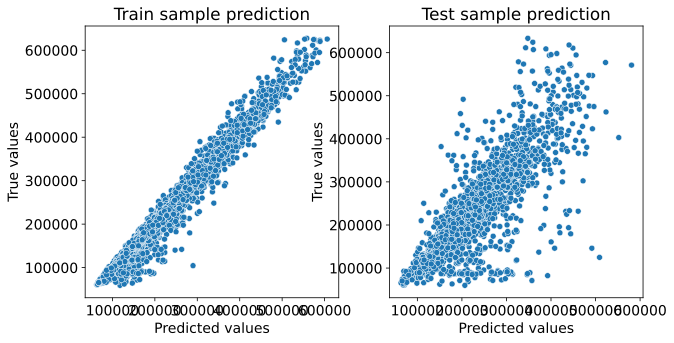

In [848]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

In [849]:
test_df.shape

(5000, 25)

In [850]:
submit = pd.read_csv('sample_submission.csv')
submit.head()

,Id,Price
0,725,200000.0
1,15856,200000.0
2,5480,200000.0
3,15664,200000.0
4,14275,200000.0


In [851]:
predictions = rf_model.predict(test_df)
predictions

array([159512.58367045, 233960.26619527, 276272.78748592, ...,
       288874.02001644, 173978.01344017, 184331.83340172])

In [852]:
submit['Price'] = predictions
submit.head()

,Id,Price
0,725,159512.583670
1,15856,233960.266195
2,5480,276272.787486
3,15664,295617.750069
4,14275,153205.882808


In [853]:
submit.to_csv('rf_submit.csv', index=False)